# K-Means clustering

In the following we apply the K-Means clustering algorithm to a simple data set of unlabeled data. This method of unsupervised learning needs as an input the the number K of clusters according to which we would like the algorithm to group our data. In a first step K points will be (randomly) thrown onto the data set and the data is grouped according to them. This is done by checking which of these K centroids is closest to EACH data point, resulting in K clusters. Then the middle of every cluster is computed and the K points will be moved into these. This will be repeated until the K centroids stop moving. 

To estimate which K is ideal, one uses the so-called elbow method. It's idea is basically to compute the mean distances of the data points of a group to the centroids and find a compromise in between a small number of K and (such) a small mean.

For further information on this method, we refer to https://en.wikipedia.org/wiki/K-means_clustering and https://stackabuse.com/k-means-clustering-with-scikit-learn/.

The data to be analyzed encompasses information on used cars and the prices for which they are traded. The goal of the clustering would be to group these. This could be used to label data and mount supervised learning methods on top of this.

In [7]:
#import relevant packages

import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

In [3]:
#define data frame
df = pd.read_csv("./cars_prepared.csv")

df.head()

,price,yearOfRegistration,powerPS,kilometer,model,fuelType,name
0,1450,1997,75,90000,andere,benzin,Toyota_Toyota_Starlet_1._Hand__TÜV_neu
1,13100,2005,280,5000,golf,benzin,R32_tauschen_oder_kaufen
2,4500,2008,87,90000,yaris,benzin,Toyota_Yaris_1.3_VVT_i
3,6000,2009,177,125000,3er,diesel,320_Alpinweiss_Kohlenstoff
4,3990,1999,118,90000,3er,benzin,BMW_318i_E46_+++_1._Hand_+++_Liebhaberfahrzeug


In [10]:
df.shape

(250, 7)

We would like to cluster data with respect to columns "price" and "yearOfRegistration":

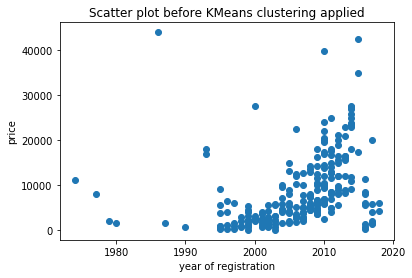

In [64]:
#visualize data first
plt.scatter(df["yearOfRegistration"], df["price"])

plt.xlabel('year of registration')
plt.ylabel('price')
plt.title('Scatter plot before KMeans clustering applied')

plt.show()

In [6]:
#define variables for learning algorithm
X = df[["yearOfRegistration", "price"]]

In [8]:
#need to rescale data as KMeans uses notion of distance
scaler = StandardScaler()
X_transformed = scaler.fit_transform(X)

/Users/Andreas/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/Andreas/anaconda3/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


## 1) ordinary K-Means clustering

In [47]:
#proceed with KMeans clustering analysis
from sklearn.cluster import KMeans

model = KMeans(n_clusters = 4) #suggest a number of clusters

model.fit(X_transformed)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [48]:
#information on data points allocated to which cluster
labels = model.labels_

#to print which point belongs to which cluster
#print(model.labels_)

In [49]:
#information on centers of the clusters
centers = model.cluster_centers_

#need to undo rescaling for the centers for later plotting
centers_transformed = scaler.inverse_transform(centers)

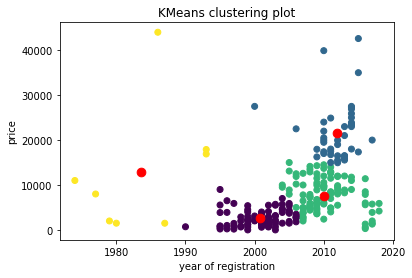

In [63]:
#visualize data after clustering; cluster centers indicated in red
plt.scatter(df["yearOfRegistration"], df["price"], c = labels)
plt.scatter(centers_transformed[:, 0], centers_transformed[:, 1], c = 'r', s = 75)

plt.xlabel('year of registration')
plt.ylabel('price')
plt.title('KMeans clustering plot')

plt.show()

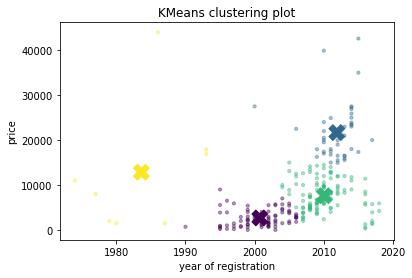

In [62]:
#visualize data after clustering; cluster centers indicated with "X"
plt.scatter(df["yearOfRegistration"], df["price"], c = labels, alpha = 0.4, s = 10)

plt.scatter(centers_transformed[:, 0], 
            centers_transformed[:, 1], 
            c = range(len(centers_transformed)), 
            marker = "X", 
            s = 250)

plt.xlabel('year of registration')
plt.ylabel('price')
plt.title('KMeans clustering plot')

plt.show()

## 2) K-Means clustering using elbow method

In [57]:
#proceed with KMeans clustering analysis
from sklearn.cluster import KMeans

scores = []

for n in range(2, 10):
    model = KMeans(n_clusters = n)
    model.fit(X_transformed)
    scores.append(model.inertia_) #Sum of squared distances of samples to their closest cluster center.

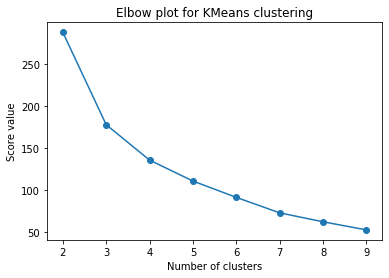

In [65]:
plt.scatter(list(range(2, 10)), scores)
plt.plot(list(range(2, 10)), scores)

plt.xlabel('Number of clusters')
plt.ylabel('Score value')
plt.title('Elbow plot for KMeans clustering')

plt.show()

From this plot we may deduce that K=3 or 4 is a good choice for the clustering procedure applied to the current data set.